In [62]:
import glob
import tensorflow as tf

In [63]:
images_folder = '../images'

Shape of the image: (1458, 1920, 3)


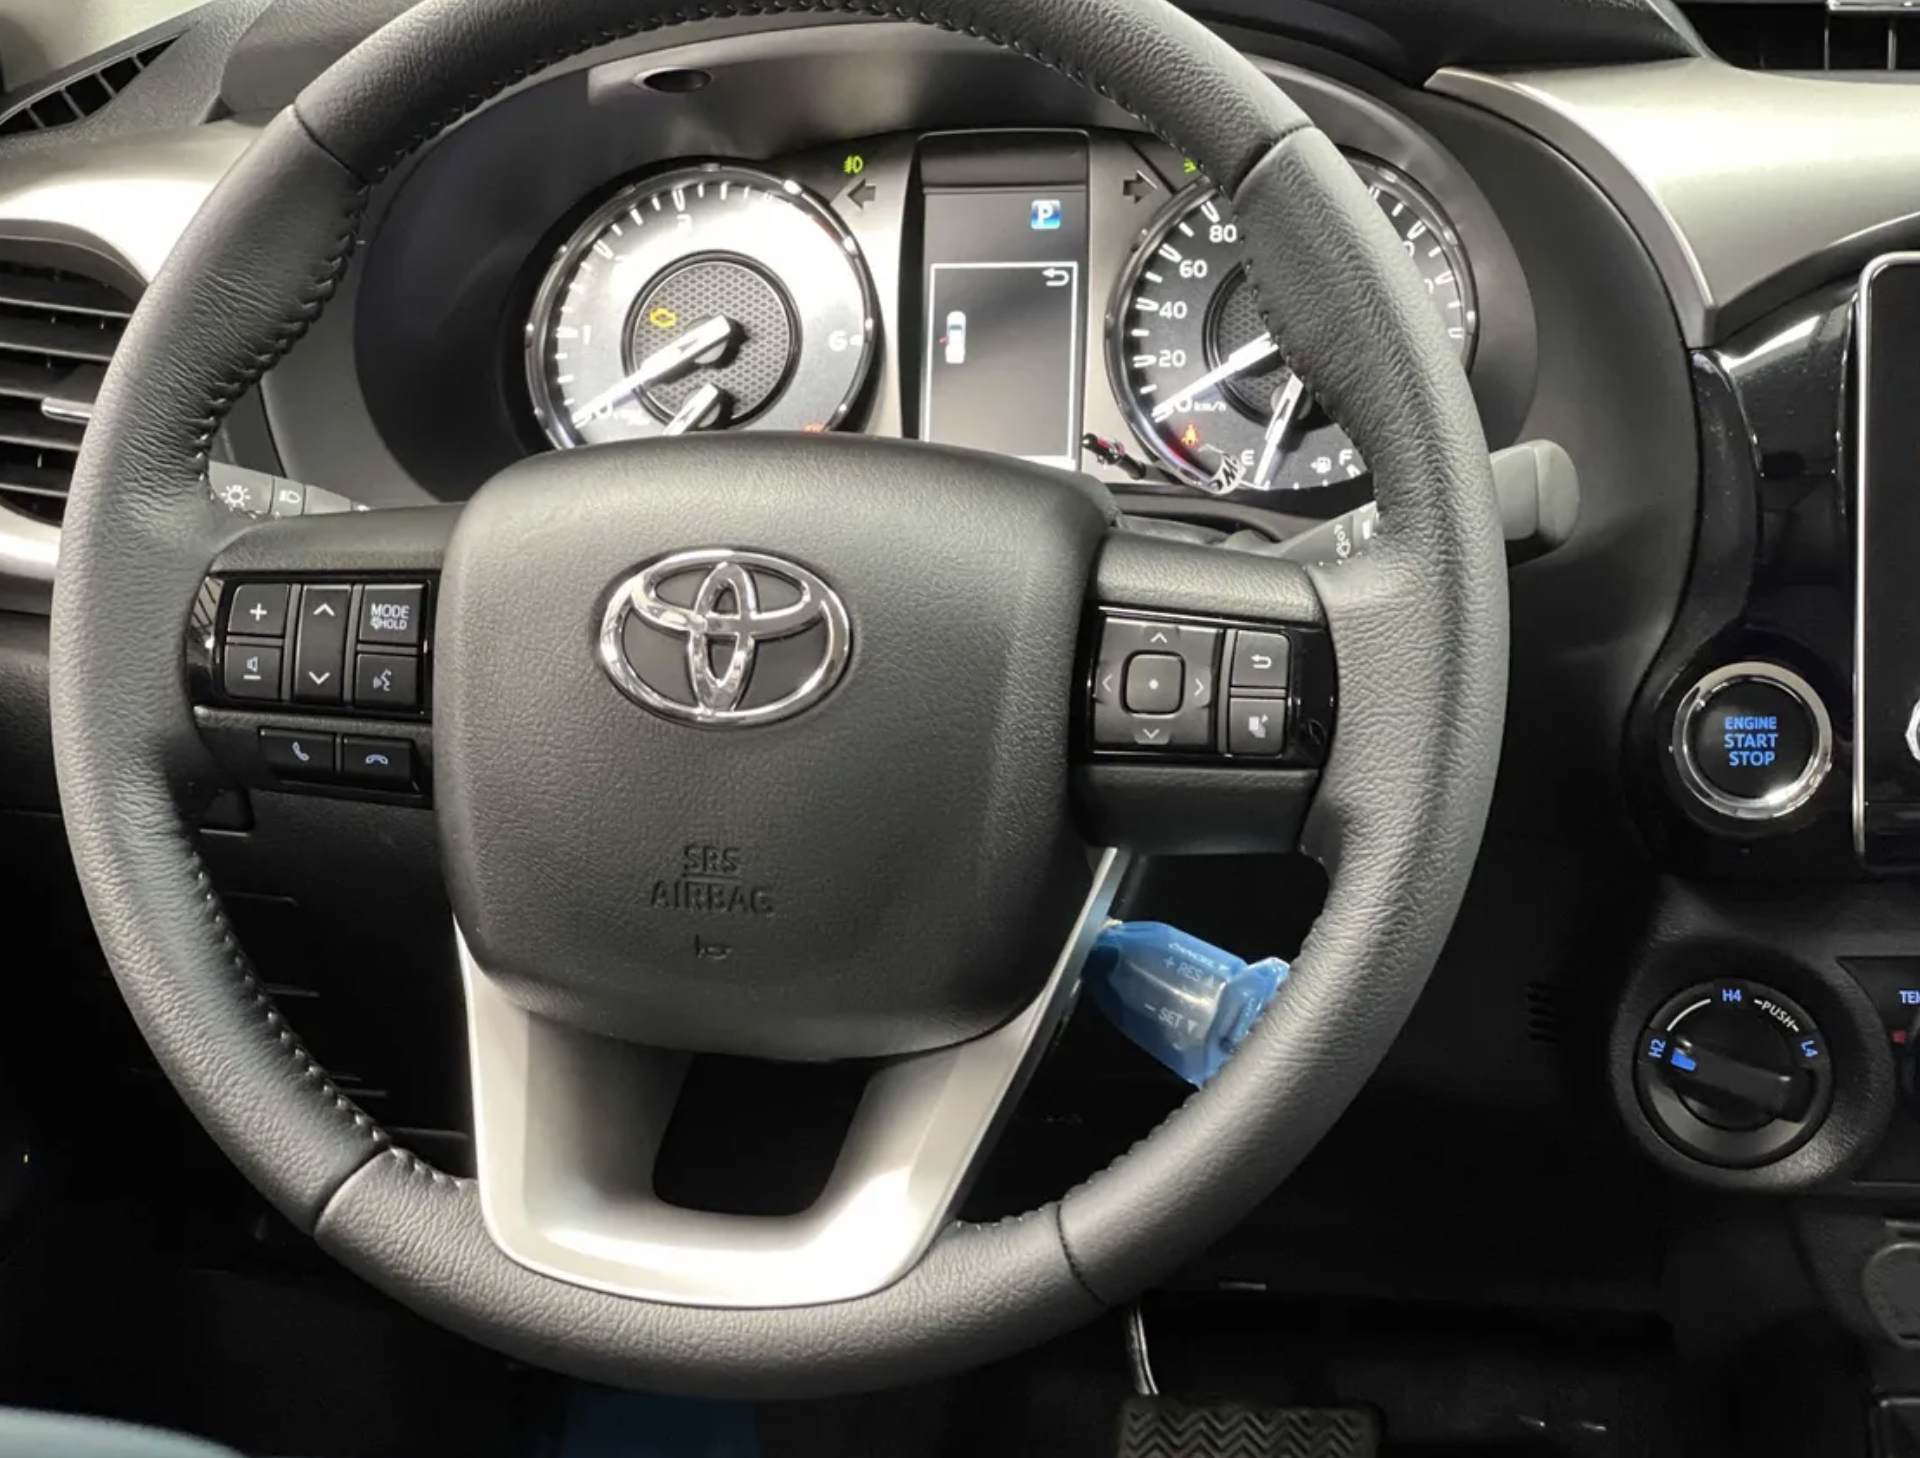

In [64]:
# test load image
image_files = glob.glob(images_folder + '/*/*.png')
image = image_files[0]

pil_image = tf.keras.preprocessing.image.load_img(image)
tf_image = tf.keras.preprocessing.image.img_to_array(pil_image)
print(f'Shape of the image: {tf_image.shape}')
pil_image

The image has a big resolution (1920 x 1458 x 3) which needs to be reduced for computational purposes.

In [65]:
# callback
class AccReached(tf.keras.callbacks.Callback):
  def __init__(self):
    pass
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True


In [66]:
# import images
train_images = tf.keras.preprocessing.image_dataset_from_directory(
  images_folder,
  labels='inferred',
  image_size=(256, 256),
  batch_size=16,
  shuffle=True,
)

Found 390 files belonging to 3 classes.


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [68]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=tf.optimizers.SGD(learning_rate=0.001),
  metrics=['accuracy'],
)

In [69]:
history = model.fit(
  train_images.repeat(),
  steps_per_epoch=10,
  epochs=100,
  verbose=1,
  callbacks=[AccReached()],
)

Epoch 1/100


2022-11-01 18:38:44.956492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 3s 132ms/step - loss: 103.3976 - accuracy: 0.5250
Epoch 2/100
10/10 [==============================] - 1s 83ms/step - loss: 0.9215 - accuracy: 0.6625
Epoch 3/100
10/10 [==============================] - 2s 212ms/step - loss: 1.0585 - accuracy: 0.5800
Epoch 4/100
10/10 [==============================] - 1s 127ms/step - loss: 0.9113 - accuracy: 0.6562
Epoch 5/100
10/10 [==============================] - 0s 29ms/step - loss: 0.9147 - accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 2s 120ms/step - loss: 0.8856 - accuracy: 0.6313
Epoch 7/100
10/10 [==============================] - 1s 77ms/step - loss: 0.9018 - accuracy: 0.6062
Epoch 8/100
10/10 [==============================] - 2s 210ms/step - loss: 0.8857 - accuracy: 0.5933
Epoch 9/100
10/10 [==============================] - 1s 126ms/step - loss: 0.8705 - accuracy: 0.6000
Epoch 10/100
10/10 [==============================] - 0s 30ms/step - loss: 0.8019 - accuracy: 0.6467
Epo

1/1 [==============================] - 0s 65ms/step
Model prediction: neither


2022-11-01 18:39:38.538056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


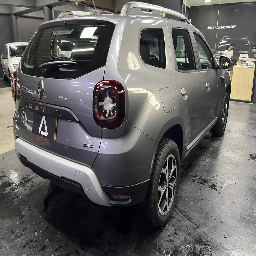

In [70]:
# prediction
new_image = image_files[50]
pil_image = tf.keras.preprocessing.image.load_img(new_image, target_size=(256, 256))
tf_image = tf.keras.preprocessing.image.img_to_array(pil_image)
probs = model.predict(tf_image.reshape(1, 256, 256, 3))
print(f'Model prediction: {train_images.class_names[probs.argmax()]}')
pil_image

In [71]:
# save the model
model.save('labeling_model.h5')

In [72]:
train_images.class_names

['back', 'front', 'neither']